# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I chose to work with the TMDB dataset. I aim to answer 2 questions by analysing this dataset:
* How do Budget, Revenue, Popularity and Vote Score relate to each other?
* Who are the most successful directors?

I will also use Seaborn for more appealing visuals.

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

First we load the data and visually check what kind of information it contains

In [2]:
data_path = "../datasets/P2/tmdb-movies.csv"
df = pd.read_csv(data_path)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next, we need more details on each of the columns in the dataset, specifically data counts and types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

* We can see clearly that there are many columns with several Null values.
* Some columns are either big blobs of text that would be hard to analyze.
* genres column can be reencoded as one column for each genre in case we need that information
* adjusted monetary values are better suited for analysis

Finally, I want to have a look at some statistics for numerical columns

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


An interesting observation regarding vote_average is that it is densly packed with 50% of the scores falling inthe range of [5.4, 6.6]. I myself have a very strict criteria not to watch anything bellow 7. Seems like that leaves me with less than 25% of released movies.

Maybe better to visualize this distribution with a histogram

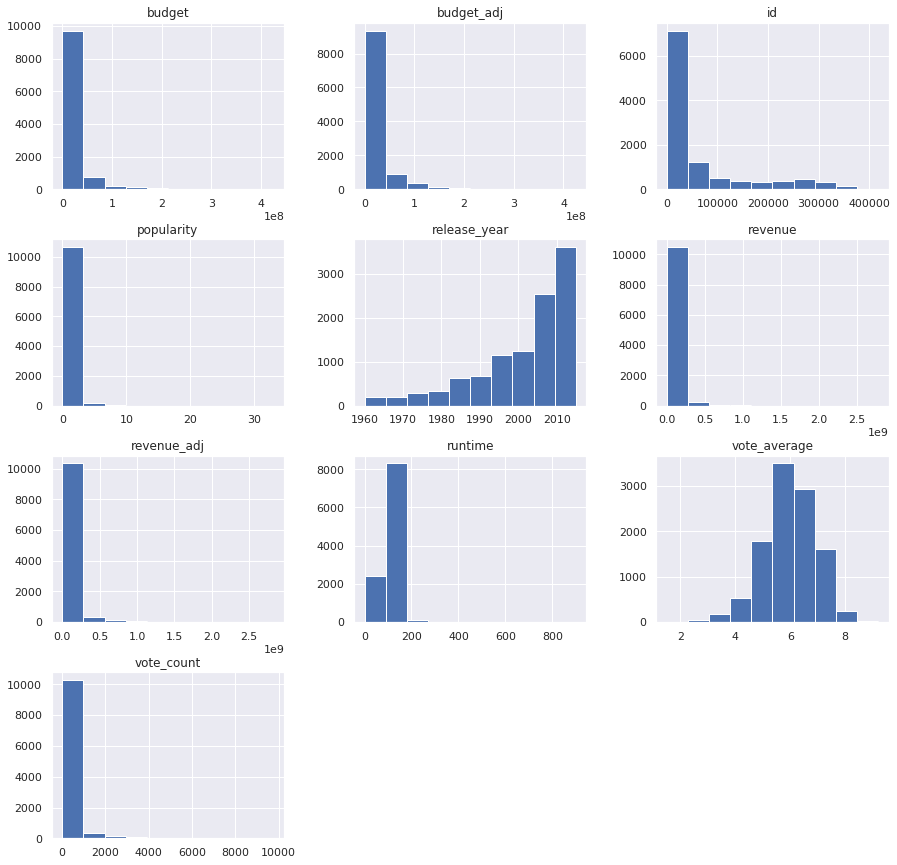

In [5]:
df.hist(figsize = (15, 15));

Most of the default histograms don't show us distributions well enough, we can come back to this in the EDA section.

### Data Cleaning (Null and unrelated data)

First, we need to drop the troublesome columns that we don't need

In [6]:
df_clean = df.copy()

columns_to_drop = ["id", "budget", "revenue", "cast", "homepage", "tagline", "keywords", "overview", "production_companies"]

df_clean.drop(columns = columns_to_drop, inplace = True)
df_clean.rename(columns={"revenue_adj": "revenue", "budget_adj": "budget"}, inplace = True)
df_clean

,imdb_id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue
0,tt0369610,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,tt0060371,0.080598,The Endless Summer,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,tt0060472,0.065543,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,tt0060161,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,tt0061177,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


Some entries have
* a `budget` of 0, that is suspicious, better drop those lines then let them mislead our findings.
* a low `vote_count`, which makes their results stastically insignificant, better drop them as well. I'll use the 50 percentile value from `df.describe()` output as a filtering threshhold.
* we will also drop any left `Null` values after this

In [7]:
df_clean = df_clean[df_clean.vote_count >= 38].dropna()
df_clean2 = df_clean[df_clean.budget != 0]

print(df_clean.shape[0]/df.shape[0], df_clean2.shape[0]/df.shape[0])

0.5027609055770292 0.35164734032762746


Filtering data with a budget of 0 out leaves us with only 35% of the original data which is very little, that's why I'd rather store it in a separate DataFrame for when we need that column, but keep a larger dataset for when we don't.

<a id='eda'></a>
## Exploratory Data Analysis


### How do Budget, Revenue, Popularity and Vote Score relate to each other?

Let's explore each of those variables on its own, I like to use boxplots and histograms for that 

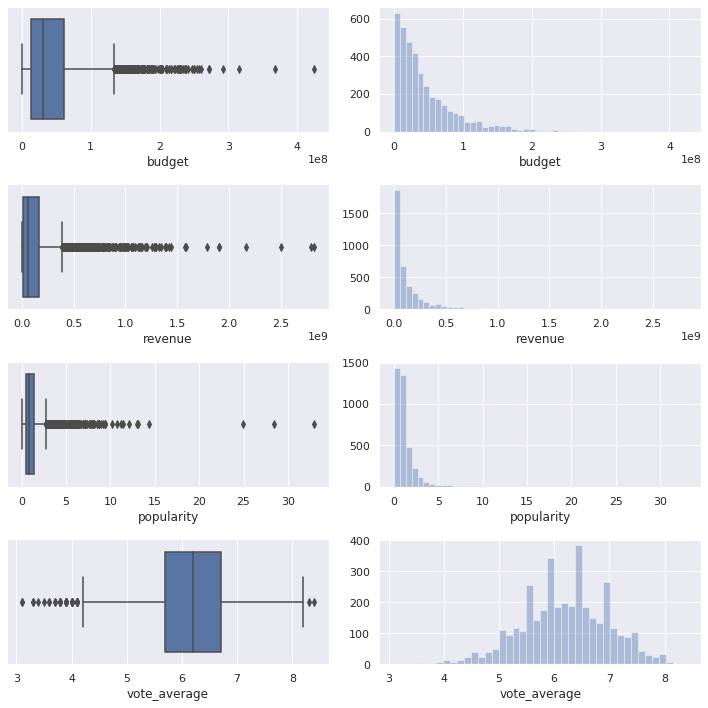

In [8]:
col_interest = ["budget", "revenue", "popularity", "vote_average"]

f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(4, 2)
for i, col in enumerate(col_interest):
    ax = f.add_subplot(gs[i,0])
    sns.boxplot(df_clean2[col]);
    ax = f.add_subplot(gs[i,1])
    sns.distplot(df_clean2[col], kde=False);
f.tight_layout()

Other than `vote_average`, it seems like the data is both skewed and has lots of outliers, we can still work with that for the purpose of this project.

Let's explore the relations between them.

/home/husmen/miniconda3/envs/dand/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


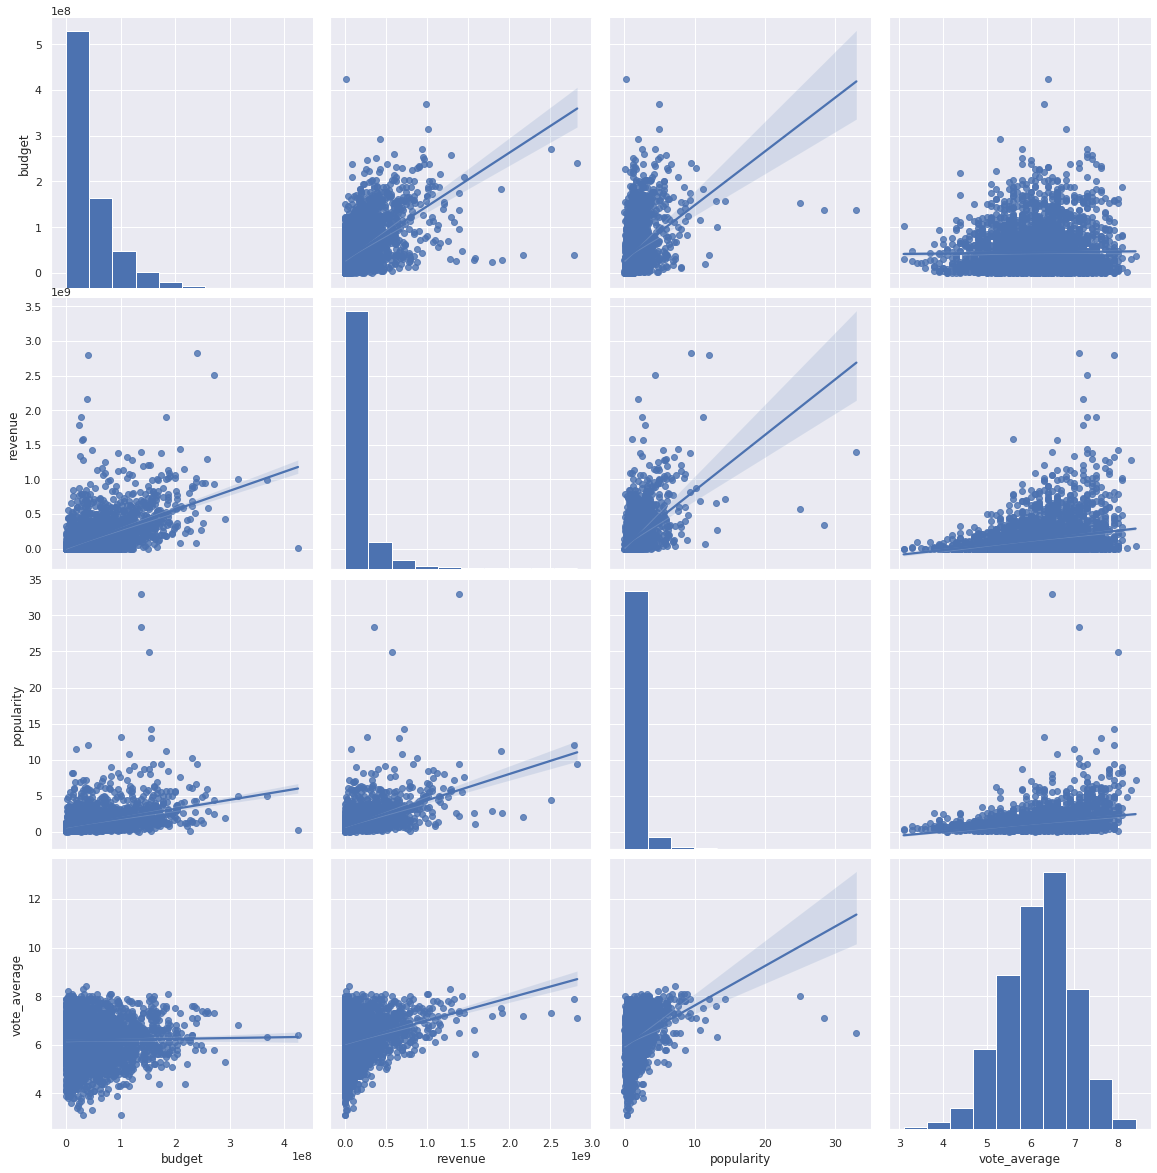

In [9]:
sns.pairplot(df_clean2[col_interest], size=4, kind="reg");

It seems like `popularity` is correlated with both `vote_average` and `revenue`, which makes sense

`budget` on the other hand doesn't seem to affect `vote_average` at all.

### Who are the most successful directors?

This question can be interpreted and answered in several ways, do we want to know who generated the most revenue? or who is most loved by fans? Eitherway, grouping our data by `director` will be the first step in answering it.

I also chose to limit results to directors with at least 3 movies, to avoid misleading results with one time successes.

In [10]:
df_grouped = df_clean.groupby("director").agg(
        num_movies=pd.NamedAgg(column='imdb_id', aggfunc='count'),
        popularity=pd.NamedAgg(column='popularity', aggfunc='mean'),
        vote_average=pd.NamedAgg(column='vote_average', aggfunc='mean'),
        revenue=pd.NamedAgg(column='revenue', aggfunc='sum'),)

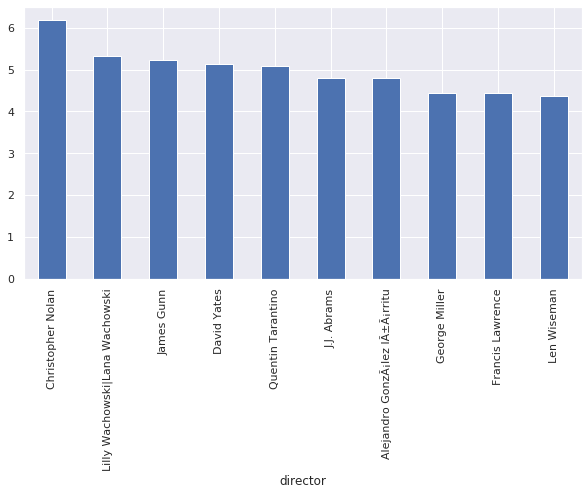

In [11]:
df_grouped[df_grouped.num_movies >=3].popularity.nlargest(10, "all").plot(kind = "bar", figsize = (10, 5));

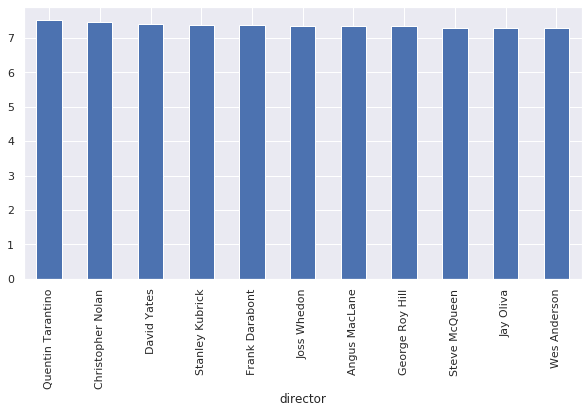

In [12]:
df_grouped[df_grouped.num_movies >=3].vote_average.nlargest(10, "all").plot(kind = "bar", figsize = (10, 5));

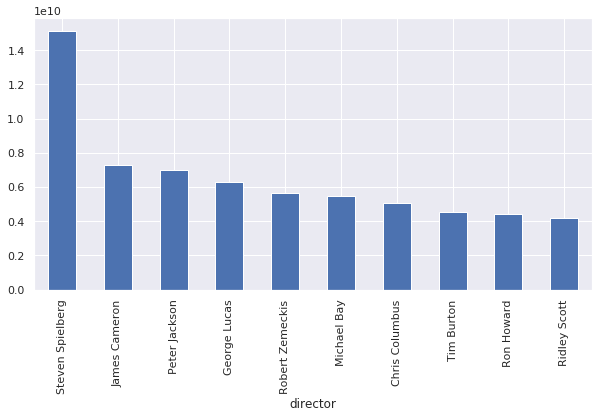

In [13]:
df_grouped[df_grouped.num_movies >=3].revenue.nlargest(10, "all").plot(kind = "bar", figsize = (10, 5));

My favorite director, Christofer Nolan, is present on all of the top 10 results, hurray!

<a id='conclusions'></a>
## Conclusions



In this project, I attempted to investigate the TMDB dataset by going through the overal process of data analysis.
* I loaded the data and cleaned it from `Null` and the features we don't need.
* Despite the skewness and outliers, some correlationa were found between some columns of the data. It was also confirmed that big budgets don't guarrantee a successful movie.
* I answered the question of who are the best directors from different point of views, No one can argue against Christofer Nolan's brilliance with these results.

In [14]:
from subprocess import call
call(["python", "-m", "nbconvert", "P2_Investigate_a_Dataset.ipynb"])

0